In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("UniversalBank.csv")

In [3]:
df.head(9)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0


In [4]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
#no null values

In [6]:
#Now deleting the columns which are not required

In [7]:
del df['ID']
del df["ZIP Code"]
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [8]:
df.groupby('CreditCard').CreditCard.count()

CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64

In [9]:
#It is an imbalanced dataset will see if accuracy decreases.

In [10]:
df.rename(columns={"Personal Loan": "Personal_Loan","Securities Account":"Sec_Acc","CD Account":"CD_Acc"},inplace=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Sec_Acc,CD_Acc,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [11]:
df['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [12]:
#it is also imbalanced we have to balance the dataset

# EDA

In [13]:
#Reordering Columns

In [14]:
# df=df[['Age','Experience','Income',"Family","CCAvg","Education","Mortgage","Sec_Acc","CD_Acc","Online","CreditCard","Personal_Loan"]]

In [15]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Sec_Acc,CD_Acc,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [16]:
df.dtypes

Age                int64
Experience         int64
Income             int64
Family             int64
CCAvg            float64
Education          int64
Mortgage           int64
Personal_Loan      int64
Sec_Acc            int64
CD_Acc             int64
Online             int64
CreditCard         int64
dtype: object

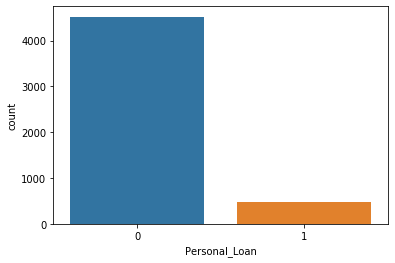

In [17]:
sns.countplot(data=df,x="Personal_Loan")

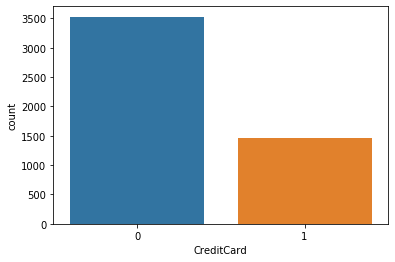

In [18]:
sns.countplot(data=df,x="CreditCard")

In [19]:
df.tail()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Sec_Acc,CD_Acc,Online,CreditCard
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0
4999,28,4,83,3,0.8,1,0,0,0,0,1,1


In [20]:
pip install bubbly

Note: you may need to restart the kernel to use updated packages.


In [21]:
# from bubbly.bubbly import bubbleplot

In [22]:
# figure = bubbleplot(dataset = df, x_column = 'Experience', y_column = 'Income', 
#     bubble_column = 'Personal_Loan', time_column = 'Age', size_column = 'Mortgage', color_column = 'Personal_Loan', 
#     x_title = "Experience", y_title = "Income", title = 'Experience vs Income. vs Age vs Mortgage vs Personal Loan',
#     x_logscale = False, scale_bubble = 3, height = 650)

# plt.iplot(figure, config={'scrollzoom': True})

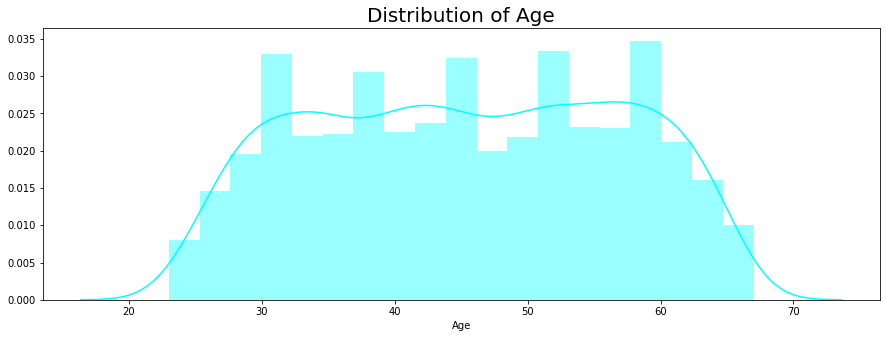

In [23]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['Age'], color = 'cyan')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

In [24]:
#Age is well managed

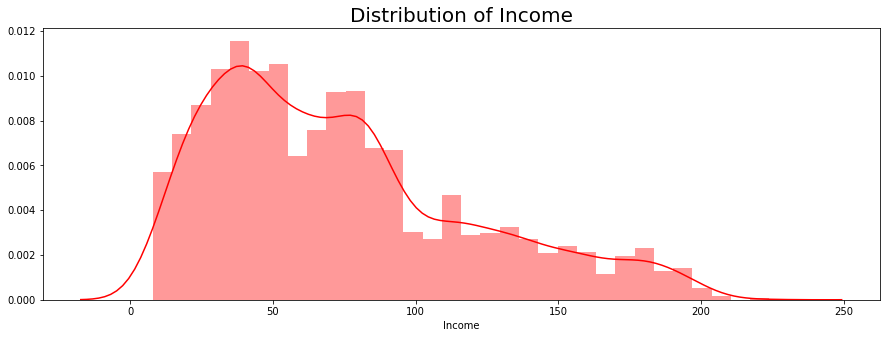

In [25]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['Income'], color = 'red',norm_hist=True)
plt.title('Distribution of Income', fontsize = 20)
plt.show()

In [26]:
#So income is not well managed.

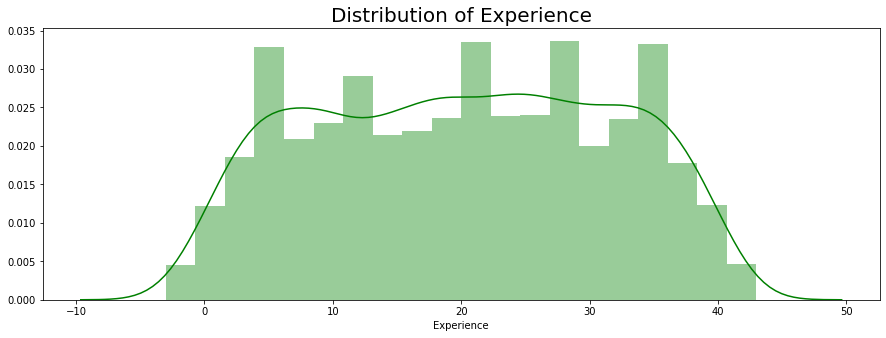

In [27]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['Experience'], color = 'green')
plt.title('Distribution of Experience', fontsize = 20)
plt.show()

In [28]:
#So Experience is welll balanced

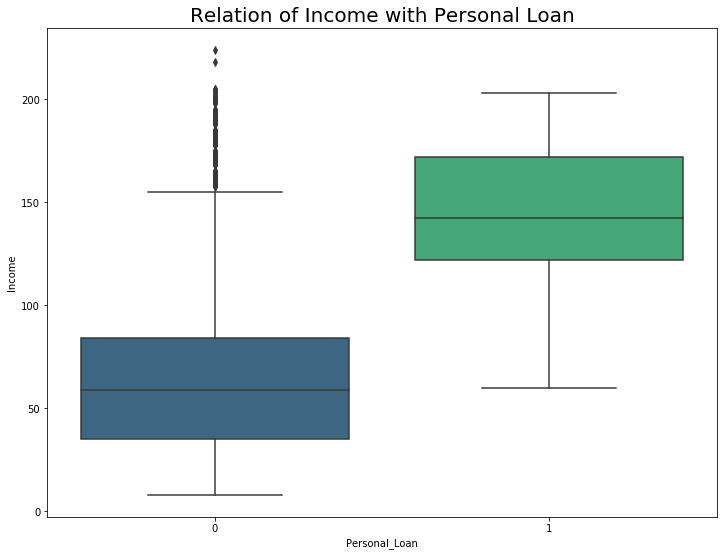

In [29]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df['Personal_Loan'], df['Income'], palette = 'viridis')
plt.title('Relation of Income with Personal Loan', fontsize = 20)
plt.show()

# FEATURE SELECTION

## CHECKING FOR CORRELATION


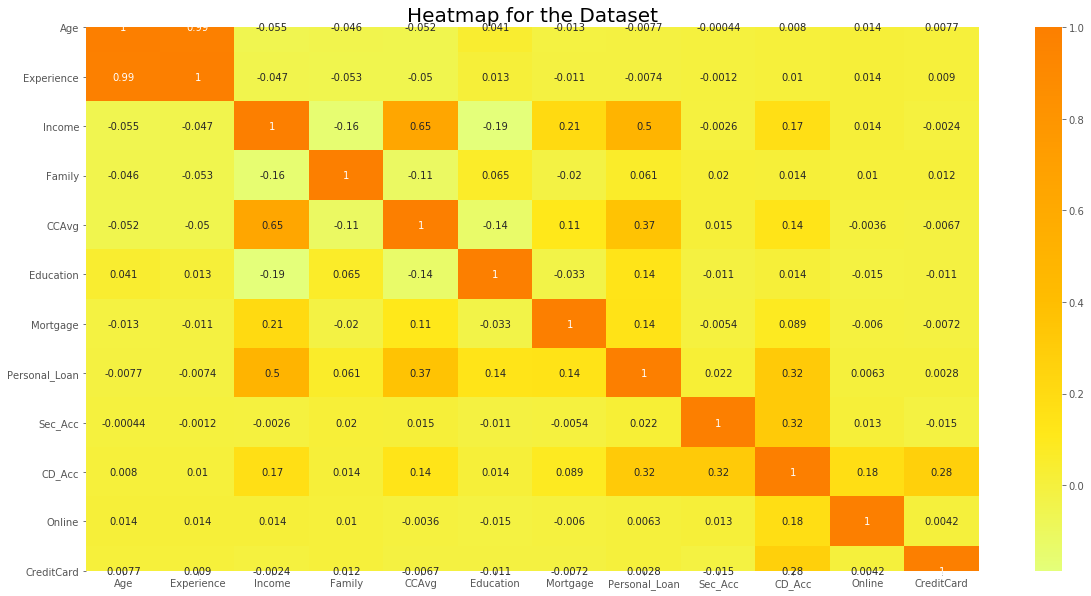

In [30]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')
sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

In [31]:
corr=df.corr()
corr["Personal_Loan"].sort_values(ascending=False)

Personal_Loan    1.000000
Income           0.502462
CCAvg            0.366889
CD_Acc           0.316355
Mortgage         0.142095
Education        0.136722
Family           0.061367
Sec_Acc          0.021954
Online           0.006278
CreditCard       0.002802
Experience      -0.007413
Age             -0.007726
Name: Personal_Loan, dtype: float64

In [140]:
x=df.drop('Personal_Loan',axis=1)
x

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Sec_Acc,CD_Acc
0,25,1,49,4,1.6,1,0,1,0
1,45,19,34,3,1.5,1,0,1,0
2,39,15,11,1,1.0,1,0,0,0
3,35,9,100,1,2.7,2,0,0,0
4,35,8,45,4,1.0,2,0,0,0
...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0
4996,30,4,15,4,0.4,1,85,0,0
4997,63,39,24,2,0.3,3,0,0,0
4998,65,40,49,3,0.5,2,0,0,0


In [33]:
y=df['Personal_Loan']

## Using Extra Trees Classifier

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [35]:
print(model.feature_importances_)

[0.04114656 0.04320254 0.34572686 0.10507936 0.15026862 0.16297402
 0.0340197  0.00995144 0.07575342 0.0131091  0.01876837]


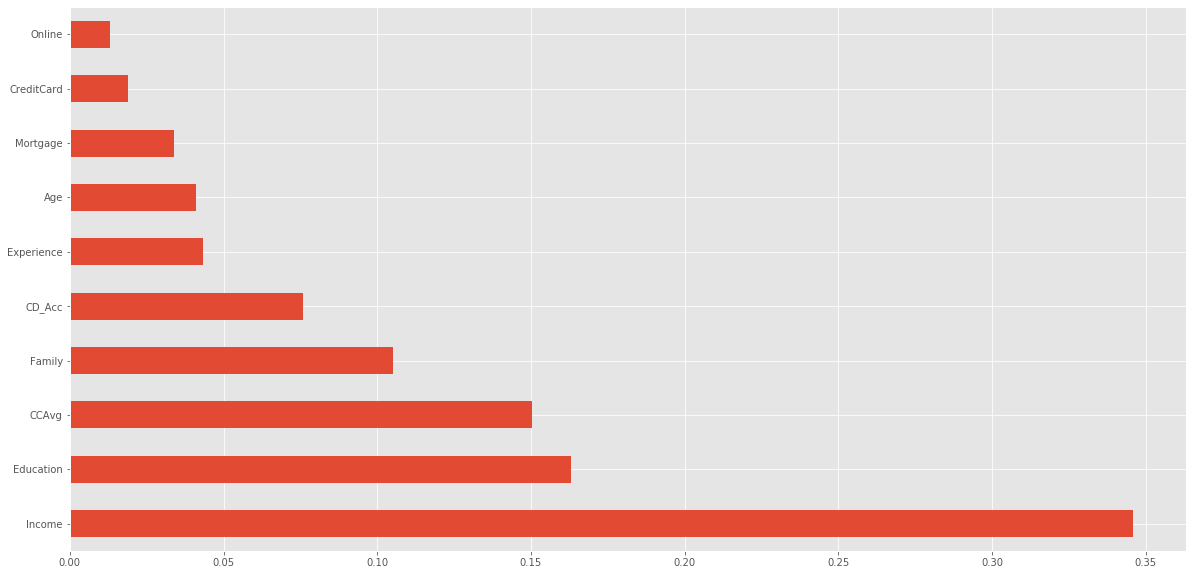

In [36]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Using ANOVA TEST

In [38]:
from sklearn.feature_selection import f_classif

In [39]:
select=f_classif(x,y)
select

(array([2.98324239e-01, 2.74675302e-01, 1.68800458e+03, 1.88931888e+01,
        7.77413007e+02, 9.52061943e+01, 1.02994466e+02, 2.41006236e+00,
        5.55829340e+02, 1.96983772e-01, 3.92268699e-02]),
 array([5.84959264e-001, 6.00235883e-001, 3.56029139e-318, 1.40990407e-005,
        3.83026616e-159, 2.70966319e-022, 5.73034172e-024, 1.20620879e-001,
        1.27840285e-116, 6.57185766e-001, 8.43007940e-001]))

In [40]:
p_values=pd.Series(select[1])
p_values.index=x.columns
p_values.sort_values(ascending=True,inplace=True)

In [41]:
p_values

Income        3.560291e-318
CCAvg         3.830266e-159
CD_Acc        1.278403e-116
Mortgage       5.730342e-24
Education      2.709663e-22
Family         1.409904e-05
Sec_Acc        1.206209e-01
Age            5.849593e-01
Experience     6.002359e-01
Online         6.571858e-01
CreditCard     8.430079e-01
dtype: float64

In [42]:
p_values=p_values[p_values<0.05]
p_values

Income       3.560291e-318
CCAvg        3.830266e-159
CD_Acc       1.278403e-116
Mortgage      5.730342e-24
Education     2.709663e-22
Family        1.409904e-05
dtype: float64

In [43]:
# From all the three feature selection techniques we have got the top features i.e Income,CCAvg,CC_Acc,Mortgage,Education

In [44]:
#Hence droping less coreleated features.

In [45]:
df.drop(['Online','CreditCard'],axis=1,inplace=True)

In [46]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Sec_Acc,CD_Acc
0,25,1,49,4,1.6,1,0,0,1,0
1,45,19,34,3,1.5,1,0,0,1,0
2,39,15,11,1,1.0,1,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0


In [47]:
df['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [48]:
#It seems to be a imbalanced dataset still trying different classification algorithms.

# TRAIN TEST AND SPLIT

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [51]:
np.bincount(Y_train)

array([3610,  390], dtype=int64)

# MODEL FITTING

In [52]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [126]:
from imblearn.over_sampling import RandomOverSampler

# LOGISTIC REGRESSION

In [53]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [54]:
from sklearn.metrics import accuracy_score

In [55]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 95.5 %


In [56]:
results = confusion_matrix(Y_test, Y_pred_lr) 
results

array([[902,   8],
       [ 37,  53]], dtype=int64)

In [57]:
print(classification_report(Y_pred_lr,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       939
           1       0.59      0.87      0.70        61

    accuracy                           0.95      1000
   macro avg       0.79      0.91      0.84      1000
weighted avg       0.97      0.95      0.96      1000



# TRYING K FOLD CROSS VALIDATION

In [135]:
from sklearn.model_selection import cross_val_score

In [147]:
score=cross_val_score(lr,x,y,cv=10)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

In [148]:
score

array([0.952, 0.944, 0.952, 0.934, 0.946, 0.95 , 0.956, 0.934, 0.966,
       0.938])

In [149]:
score.mean()

0.9471999999999999

In [150]:
# So by k fold cross validation we get that our model's accuracy will lie from 93.4% to 96.6% with a mean of 94.7%

In [58]:
#No we have to oversample the data by using SMOTE ALgorithm as our True negatives are less.Here you can also use Nearmiss(undersampling) and check for the accuracy.

In [59]:
# pip install imblearn

In [60]:
smt=SMOTE()
x_new,y_new= smt.fit_sample(x, y)

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(x_new,y_new,test_size=0.20,random_state=0)

In [62]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [63]:
np.bincount(Y_train)

array([3629, 3603], dtype=int64)

In [64]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 88.77 %


In [65]:
results = confusion_matrix(Y_test, Y_pred_lr) 
results

array([[766, 125],
       [ 78, 839]], dtype=int64)

In [66]:
print(classification_report(Y_pred_lr,Y_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       844
           1       0.91      0.87      0.89       964

    accuracy                           0.89      1808
   macro avg       0.89      0.89      0.89      1808
weighted avg       0.89      0.89      0.89      1808



In [67]:
#Now our true negatives are also more so it now predicting well.

# NAIVE BAYES

In [68]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [69]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 87.94 %


In [70]:
results = confusion_matrix(Y_test, Y_pred_nb) 
results

array([[773, 118],
       [100, 817]], dtype=int64)

In [71]:
print(classification_report(Y_pred_nb,Y_test))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       873
           1       0.89      0.87      0.88       935

    accuracy                           0.88      1808
   macro avg       0.88      0.88      0.88      1808
weighted avg       0.88      0.88      0.88      1808



# K NEAREST NEIGHBORS 

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [73]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 90.82 %


In [74]:
results = confusion_matrix(Y_test, Y_pred_knn) 
results

array([[747, 144],
       [ 22, 895]], dtype=int64)

In [75]:
print(classification_report(Y_pred_knn,Y_test))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       769
           1       0.98      0.86      0.92      1039

    accuracy                           0.91      1808
   macro avg       0.91      0.92      0.91      1808
weighted avg       0.92      0.91      0.91      1808



# DECISION TREE

In [76]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [77]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 97.35 %


In [78]:
results = confusion_matrix(Y_test, Y_pred_dt) 
results

array([[862,  29],
       [ 19, 898]], dtype=int64)

In [79]:
print(classification_report(Y_pred_dt,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       881
           1       0.98      0.97      0.97       927

    accuracy                           0.97      1808
   macro avg       0.97      0.97      0.97      1808
weighted avg       0.97      0.97      0.97      1808



# RANDOM FOREST

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
model=RandomForestClassifier()

In [106]:
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
Y_pred_rf=model.predict(X_test)

In [108]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 98.73 %


In [109]:
confusion_matrix(Y_test,Y_pred_rf)

array([[880,  11],
       [ 12, 905]], dtype=int64)

In [110]:
print(classification_report(Y_pred_rf,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       892
           1       0.99      0.99      0.99       916

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808



In [ ]:
# pip install xgboost

In [82]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [83]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 98.89 %


In [84]:
confusion_matrix(Y_test,Y_pred_xgb)

array([[880,  11],
       [  9, 908]], dtype=int64)

In [85]:
print(classification_report(Y_pred_xgb,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       889
           1       0.99      0.99      0.99       919

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808



# NEURAL NETWORK

In [87]:
from keras.models import Sequential
from keras.layers import Dense

In [90]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [91]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
7232/7232 [==============================] - 2s 324us/step - loss: 12.4290 - accuracy: 0.5400
Epoch 2/300
7232/7232 [==============================] - 0s 68us/step - loss: 1.0281 - accuracy: 0.7132
Epoch 3/300
7232/7232 [==============================] - 0s 69us/step - loss: 0.4212 - accuracy: 0.8529
Epoch 4/300
7232/7232 [==============================] - 0s 68us/step - loss: 0.3972 - accuracy: 0.8597
Epoch 5/300
7232/7232 [==============================] - 0s 64us/step - loss: 0.3748 - accuracy: 0.8644
Epoch 6/300
7232/7232 [==============================] - 0s 62us/step - loss: 0.3627 - accuracy: 0.8660
Epoch 7/300
7232/7232 [==============================] - 0s 63us/step - loss: 0.3483 - accuracy: 0.8696
Epoch 8/300
7232/7232 [==============================] - 0s 69us/step - loss: 0.3371 - accuracy: 0.8722
Epoch 9/300
7232/7232 [==============================] - 0s 66us/step - loss: 0.3290 - accuracy: 0.8753
Epoch 10/300
7232/7232 [==============================] - 0s 6

In [92]:
Y_pred_nn = model.predict(X_test)

In [93]:
Y_pred_nn.shape

(1808, 1)

In [94]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [95]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 93.64 %


In [101]:
confusion_matrix(Y_test,Y_pred_nn)

array([[823,  68],
       [ 47, 870]], dtype=int64)

In [102]:
print(classification_report(Y_pred_nn,Y_test))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       870
         1.0       0.95      0.93      0.94       938

    accuracy                           0.94      1808
   macro avg       0.94      0.94      0.94      1808
weighted avg       0.94      0.94      0.94      1808



In [111]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf,score_xgb,score_nn]

algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 88.77 %
The accuracy score achieved using Naive Bayes is: 87.94 %
The accuracy score achieved using K-Nearest Neighbors is: 90.82 %
The accuracy score achieved using Decision Tree is: 97.35 %
The accuracy score achieved using Random Forest is: 98.73 %
The accuracy score achieved using XGBoost is: 98.89 %
The accuracy score achieved using Neural Network is: 93.64 %


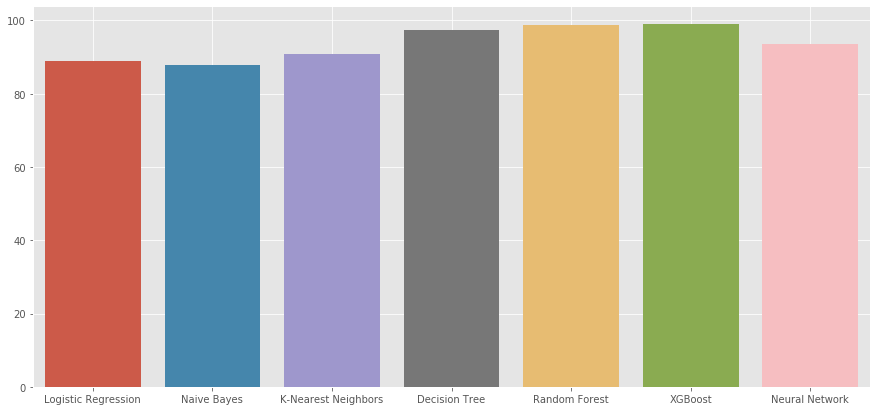

In [124]:
sns.barplot(x=algorithms,y=scores)
plt.rcParams['figure.figsize'] = (15, 5)
plt.grid(True)

In [117]:
from collections import OrderedDict 
dict = {'Logistic Regression':score_lr,'Naive Bayes':score_nb,'K Nearest Neighbors':score_knn,'Decision Tree':score_dt,'Random Forest':score_rf,'XGBoost':score_xgb,'Neural Network':score_nn} 
dict1 = OrderedDict(sorted(dict.items())) 
print(dict1) 

OrderedDict([('Decision Tree', 97.35), ('K Nearest Neighbors', 90.82), ('Logistic Regression', 88.77), ('Naive Bayes', 87.94), ('Neural Network', 93.64), ('Random Forest', 98.73), ('XGBoost', 98.89)])


# SO XGBOOST MODEL GAVE US THE HIGHEST ACCURACY..

In [134]:
#Here we saw that the accuracy of Logistic Regression was very low so we can check the accuracy by hyperparameter tuning.